# Multiclass SVM
Implement the One-vs-Rest version of the SVM classifier to distinguish classes in the MNIST dataset. Evaluate the classifier by calculating the confusion matrix, and from this, calculate accuracy, precision and recall. Try a different number of iterations and changing the kernel. Comment on the results.


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
# Load the dataset using scikit-learn: https://scikit-learn.org/stable/datasets/toy_dataset.html
digits = datasets.load_digits()

# Flatten the images
n_samples = len(digits.images) # 1437 x 8 x 8 x 5 x 12
data = digits.images.reshape((n_samples, -1))
print(data.shape)

# 80-20 train-test split
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

# How many objects and features?
x_train.shape, x_test.shape

(1797, 64)


((1437, 64), (360, 64))

In [ ]:
# Manually implement One vs Rest 

# Initialise parameters
kernel = 'linear'
max_iteration = 1000

# Initialise an SVM classification model for each one of the 10 classes
models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True),
          SVC(kernel=kernel, max_iter=max_iteration, probability=True)]

#models = [SVC(kernel=kernel, max_iter=max_iteration, probability=True) for i in range (10)] # Even better


# Train (fit in Sklearn slang) the models (P.S: this might take a while)
for i in range(10):
  models[i].fit(x_train, y_train==i)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1

[[33  0  0  0  1  0  1  0  0  0]
 [ 0 28  0  0  0  0  0  0  2  6]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  2  1 27  0  3  0  2  2  0]
 [ 0  1  0  0 34  0  0  0  1  1]
 [ 0  1  0  0  0 36  0  0  0  0]
 [ 0  1  0  0  0  0 35  0  1  0]
 [ 0  1  0  0  0  0  0 31  4  0]
 [ 0  2  0  1  0  0  0  0 30  0]
 [ 0  1  0  3  0  0  0  0  2 31]]


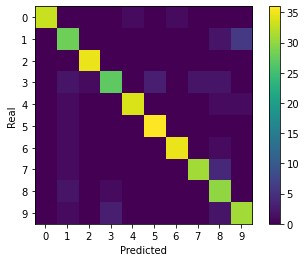

In [ ]:
# Classify (make predictions) the data of the testing set and build the confusion matrix
predicted_scores = []
for i in range(10):
  predicted_scores.append(models[i].predict_proba(x_test)[:,1])

predicted_scores = np.asarray(predicted_scores)
predicted = np.argmax(predicted_scores,axis=0)

conf_mat = confusion_matrix(y_test, predicted)

# Print and then perform and imshow of the confusion matrix
from matplotlib import pyplot as plt
print(conf_mat)
plt.imshow(conf_mat)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1,2,3,4,5,6,7,8,9],["0","1","2","3","4","5","6","7","8","9"])
plt.yticks([0,1,2,3,4,5,6,7,8,9], ["0","1","2","3","4","5","6","7","8","9"])
plt.ylabel("Real")
plt.show()

In [ ]:
# Manually calculate accuracy, precision and recall (of the whole classifier) from the confusion matrix
accuracy = np.sum(conf_mat.diagonal())/np.sum(conf_mat)

precision = []
recall = []
for i in range(10):
  precision.append(conf_mat[i,i]/ np.sum(conf_mat[:,i]))
  recall.append(conf_mat[i,i]/ np.sum(conf_mat[i,:]))

precision = np.mean(np.asarray(precision))
recall  = np.mean(np.asarray(recall))

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision: ' + "{0:.2f}".format(precision))
print('Classifier recall: ' + "{0:.2f}".format(recall))

Classifier accuracy: 88.89%
Classifier precision: 0.89
Classifier recall: 0.89


In [ ]:
# Use sklearn to calculate the accuracy, precision and recall (of the whole classifier)

# Hint: in sklearn, when dealing with multiclass problems, you need to specify the type of 
# averaging for the precision and recall metrics. What we did before can be simulated with 
# average='macro', but if you want say a weighted mean you can use average='weighted'.
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')

print('Classifier accuracy (sklearn): ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision (sklearn): ' + "{0:.2f}".format(precision))
print('Classifier recall (sklearn): ' + "{0:.2f}".format(recall))

Classifier accuracy (sklearn): 88.89%
Classifier precision (sklearn): 0.89
Classifier recall (sklearn): 0.89


FYI: You can implement a OnevsRest classifier in a much simpler way by using Sklearn's API: https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

Give it a look if you have some time.